# Laboratório 1 - Aprendizado de Máquina Preditivo 
#### (CMC-15 - Inteligência Artifical)
#### Alunos: Antônio Gustavo Dantas, Leonardo Schneider e Lucca Haddad

## 1. Seleção de features relevantes

Foram fornecidos 21 conjuntos de características para análise de dados, dos quais escolhemos os 5 a seguir:


- **AutoColorCorrelogram**: Captura a correlação espacial de cores nas imagens, sendo robusta a mudanças de aparência e forma. Isso é útil para distinguir meteoros com base na variação de cores em diferentes áreas da imagem, o que é crucial em um cenário dinâmico como o céu noturno.

- **CEDD**: Combina informações de cor e textura em um histograma compacto, permitindo uma representação rica de imagens astronômicas. A combinação dessas características é importante para capturar tanto a aparência visual quanto as texturas dos meteoros em contraste com o fundo.

- **FCTH**: Integra cor e textura em um histograma fuzzy, sendo eficaz mesmo em condições de distorção e ruído. Isso é relevante para imagens astronômicas, nas quais os meteoros podem aparecer com variações de forma e iluminação, exigindo uma característica robusta.

- **Haralick**: Usa matrizes de coocorrência para medir texturas, sendo ideal para capturar a variação de textura entre objetos brilhantes (meteoros) e fundos uniformes (céu). A textura é um fator-chave para diferenciar meteoros de ruído visual.

- **Gabor**: Analisa a frequência e a textura em direções específicas, semelhante ao sistema visual humano. Isso ajuda a identificar meteoros por suas características de movimento e variações de frequência em uma área específica da imagem.

### 1.1. Análise estatística das features selecionadas

#### 1.1.1. Definição de funções auxiliares e importação de bibliotecas e de dados

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
train_AutoColorCorrelogram = pd.read_csv('data/DatasetPerFeature/train_AutoColorCorrelogram.csv')
train_CEDD = pd.read_csv('data/DatasetPerFeature/train_CEDD.csv')
train_FCTH = pd.read_csv('data/DatasetPerFeature/train_FCTH.csv')
train_Haralick = pd.read_csv('data/DatasetPerFeature/train_Haralick.csv')
train_Gabor = pd.read_csv('data/DatasetPerFeature/train_Gabor.csv')

In [24]:
def removeColumnsOfZeros(data, ignored_columns=None):
    if ignored_columns is None:
        ignored_columns = ['Class']
    
    data_ignored = data[ignored_columns]
    data_to_process = data.drop(columns=ignored_columns, axis=1)
    columns_to_drop = data_to_process.columns[(data_to_process == 0).all()]
    data_to_process.drop(columns=columns_to_drop, inplace=True)

    if 'Unnamed: 0' in data_to_process.columns:
        data_to_process.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

    final_data = pd.concat([data_to_process, data_ignored], axis=1)
    return final_data

In [25]:
def removeDuplicatedColumns(data, ignored_columns=None):
    if ignored_columns is None:
        ignored_columns = ['Class']
    
    data_ignored = data[ignored_columns]
    data_to_process = data.drop(columns=ignored_columns, axis=1)
    columns_to_drop = []
    
    for i in range(data_to_process.shape[1]):
        for j in range(i + 1, data_to_process.shape[1]):
            if data_to_process.iloc[:, i].equals(data_to_process.iloc[:, j]):
                columns_to_drop.append(data_to_process.columns[j])
    
    data_to_process.drop(columns=columns_to_drop, inplace=True)
    final_data = pd.concat([data_to_process, data_ignored], axis=1)
    return final_data

In [26]:
def removeFullyCorrelated(data, threshold=0.95, ignored_columns=None):
    if ignored_columns is None:
        ignored_columns = ['Class']
    
    data_ignored = data[ignored_columns]
    data_to_process = data.drop(columns=ignored_columns, axis=1)
    corr_matrix = data_to_process.corr().abs()
    
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    data_to_process.drop(columns=to_drop, inplace=True)
    
    final_data = pd.concat([data_to_process, data_ignored], axis=1)
    return final_data

In [44]:
def minMaxScaling(data, ignored_columns=['Index', 'Class']):
    data_ignored = data[ignored_columns]
    data_to_process = data.drop(columns=ignored_columns, axis=1)
    data_normalized = (data_to_process - data_to_process.min()) / (data_to_process.max() - data_to_process.min())
    final_data = pd.concat([data_ignored, data_normalized], axis=1)
    return final_data

#### 1.1.2. Investigação estatística de *AutoColorCorrelogram*, *CEDD* e *FCTH*

In [28]:
train_AutoColorCorrelogram.describe()

,Unnamed: 0,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V761,V762,V763,V764,V765,V766,V767,V768,V769,Class
count,80.000000,80.000000,80.000000,80.000000,80.0,80.0,80.0,80.0,80.0,80.0,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.00000
mean,62.375000,0.000474,0.000645,0.000619,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32500
std,34.113131,0.001702,0.002351,0.002245,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.47133
min,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
25%,33.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
50%,61.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
75%,89.250000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000
max,122.000000,0.009762,0.014645,0.013801,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000


In [29]:
train_CEDD.describe()

,Unnamed: 0,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V137,V138,V139,V140,V141,V142,V143,V144,V145,Class
count,80.000000,80.00000,80.000000,80.000000,80.0,80.0,80.0,80.0,80.0,80.0,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.00000
mean,62.375000,0.02500,6.875000,1.537500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32500
std,34.113131,0.15711,0.623891,1.582689,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.47133
min,1.000000,0.00000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
25%,33.500000,0.00000,7.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
50%,61.500000,0.00000,7.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
75%,89.250000,0.00000,7.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000
max,122.000000,1.00000,7.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000


In [30]:
train_FCTH.describe()

,Unnamed: 0,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V185,V186,V187,V188,V189,V190,V191,V192,V193,Class
count,80.000000,80.000000,80.0,80.000000,80.0,80.0,80.0,80.0,80.0,80.0,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.00000
mean,62.375000,0.175000,7.0,2.912500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32500
std,34.113131,0.651677,0.0,2.788738,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.47133
min,1.000000,0.000000,7.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
25%,33.500000,0.000000,7.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
50%,61.500000,0.000000,7.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
75%,89.250000,0.000000,7.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000
max,122.000000,3.000000,7.0,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000


Como pode-se observar nas descrições estatísticas anteriores, os três conjuntos de dados apresentam grande quantidade de colunas sem qualquer informação, apenas zeros. Para reduzirmos a dimensionalidade e buscarmos maior entropia entre os dados, eliminaremos as colunas com esse perfil.

In [31]:
train_AutoColorCorrelogram = removeColumnsOfZeros(train_AutoColorCorrelogram)
train_CEDD = removeColumnsOfZeros(train_CEDD)
train_FCTH = removeColumnsOfZeros(train_FCTH)

Após a limpeza, percebe-se uma grande redução na quantidade de colunas. Após a aplicação da função de limpeza, tivemos grandes reduções no número de colunas: 90\% para *AutoColorCorrelogram*, 89\% para *CEDD* e 86\% para *FCTH*.
Em seguida, analisaremos as matrizes de correlação dos três conjuntos de dados em análise.

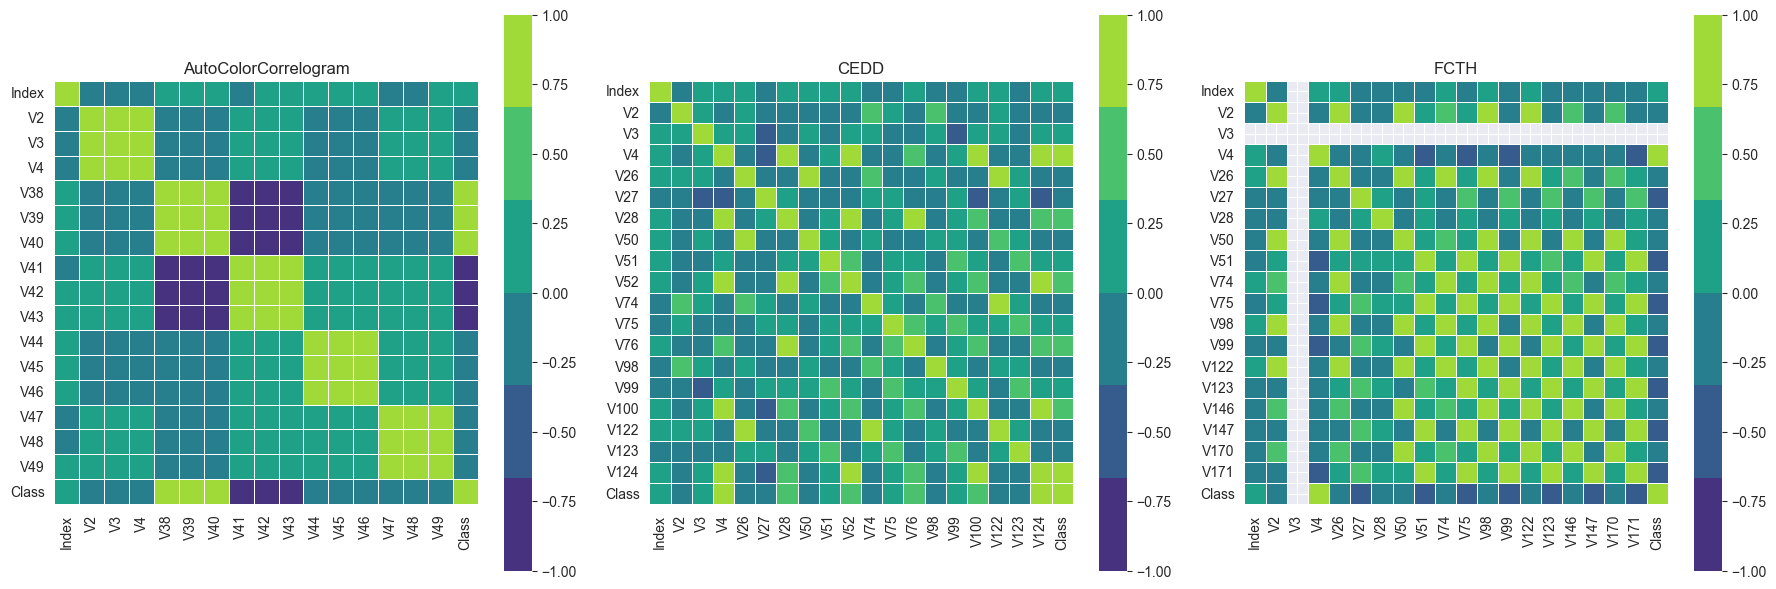

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

colormap = sns.color_palette("viridis")

sns.heatmap(train_AutoColorCorrelogram.corr(), ax=axes[0], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[0].set_title('AutoColorCorrelogram')

sns.heatmap(train_CEDD.corr(), ax=axes[1], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[1].set_title('CEDD')

sns.heatmap(train_FCTH.corr(), ax=axes[2], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[2].set_title('FCTH')

plt.tight_layout()
plt.show()

In [33]:
train_AutoColorCorrelogram = removeFullyCorrelated(train_AutoColorCorrelogram)
train_CEDD = removeFullyCorrelated(train_CEDD)
train_FCTH = removeFullyCorrelated(train_FCTH)

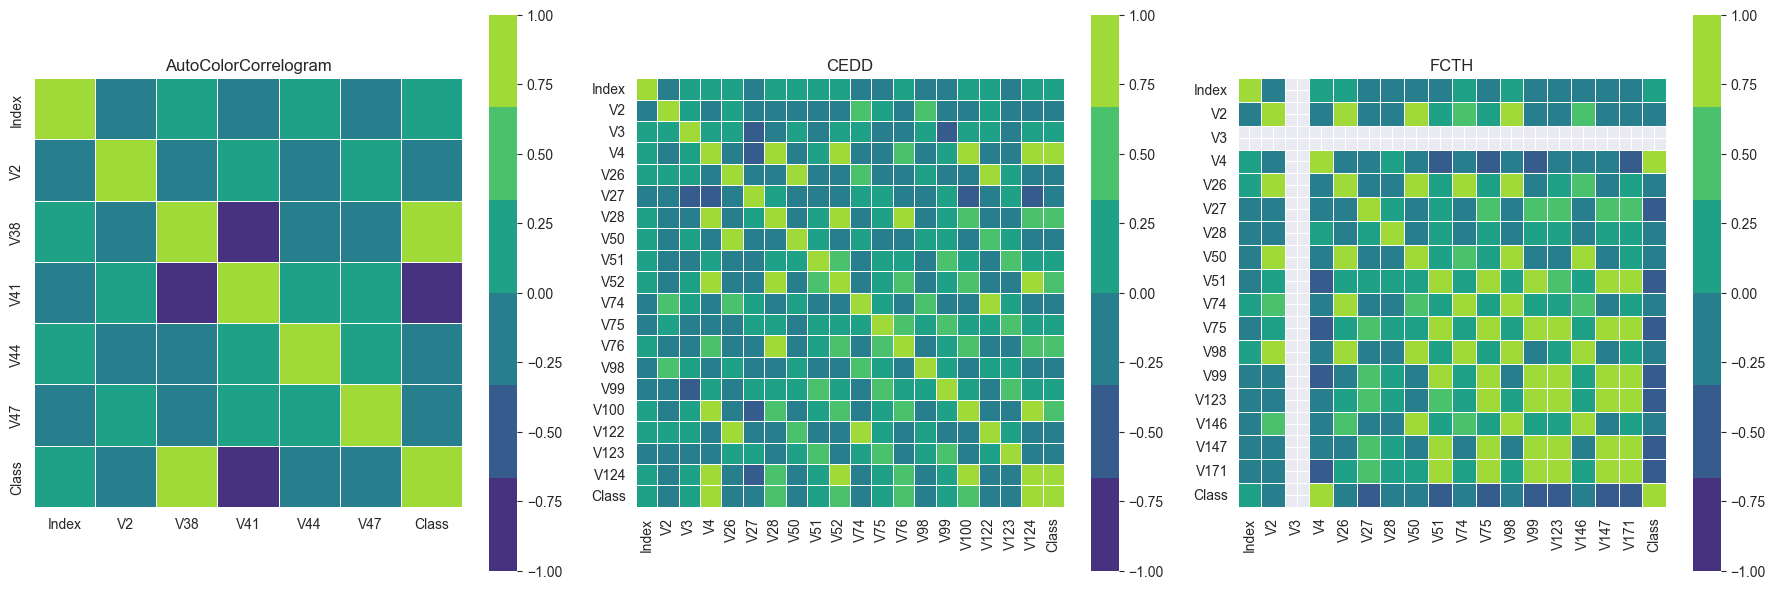

In [34]:
_, axes = plt.subplots(1, 3, figsize=(18,6))

colormap = sns.color_palette("viridis")

sns.heatmap(train_AutoColorCorrelogram.corr(), ax=axes[0], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[0].set_title('AutoColorCorrelogram')

sns.heatmap(train_CEDD.corr(), ax=axes[1], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[1].set_title('CEDD')

sns.heatmap(train_FCTH.corr(), ax=axes[2], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[2].set_title('FCTH')

plt.tight_layout()
plt.show()

#### 1.1.3. Investigação estatística de *Haralick* e *Gabor*

In [35]:
train_Haralick.describe()

,Unnamed: 0,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Class
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,79.000000,80.000000,80.00000
mean,62.375000,0.197510,7.986650,10165.315756,4616.503933,0.714046,18.827915,24.936290,1.737776,2.343737,6.605771,1.117765,-0.142269,0.447430,1.082503,0.32500
std,34.113131,0.069451,15.476012,7613.148476,2420.563803,0.065762,4.576148,33.383887,0.351297,0.505288,12.467771,0.253622,0.064928,0.171024,0.275807,0.47133
min,1.000000,0.043245,0.616263,2983.750453,2290.947000,0.430911,13.183545,1.522707,1.292464,1.671113,0.410281,0.823935,-0.303673,0.139046,0.441210,0.00000
25%,33.500000,0.158276,1.822791,4418.277835,3028.324000,0.693387,15.130420,3.951796,1.454600,1.936521,1.403946,0.946033,-0.185749,0.296911,0.880997,0.00000
50%,61.500000,0.195290,3.504700,6990.091903,3888.655371,0.735394,18.060155,12.278243,1.684906,2.266806,2.739009,1.047006,-0.128826,0.437988,1.039837,0.00000
75%,89.250000,0.240405,6.011339,14643.575026,5797.530367,0.749246,21.776651,30.327321,1.937686,2.627481,5.208278,1.222937,-0.095639,0.573098,1.245490,1.00000
max,122.000000,0.378872,91.967867,32238.576761,12526.648702,0.787886,31.502464,183.329454,2.705263,3.851403,70.969375,2.087423,-0.023144,0.773096,1.864446,1.00000


In [36]:
train_Gabor.describe()

,Unnamed: 0,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V53,V54,V55,V56,V57,V58,V59,V60,V61,Class
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,62.375000,6.033603,0.039609,6.035631,0.039623,6.035631,0.039623,6.033603,0.039609,6.035631,...,0.040498,6.168961,0.040498,6.166888,0.040484,6.168961,0.040498,6.168961,0.040498,0.32500
std,34.113131,1.411215,0.023761,1.411690,0.023769,1.411690,0.023769,1.411215,0.023761,1.411690,...,0.024294,1.442874,0.024294,1.442390,0.024286,1.442874,0.024294,1.442874,0.024294,0.47133
min,1.000000,4.342960,0.013265,4.344420,0.013269,4.344420,0.013269,4.342960,0.013265,4.344420,...,0.013562,4.440390,0.013562,4.438898,0.013558,4.440390,0.013562,4.440390,0.013562,0.00000
25%,33.500000,4.910594,0.020198,4.912245,0.020204,4.912245,0.020204,4.910594,0.020198,4.912245,...,0.020651,5.020759,0.020651,5.019072,0.020644,5.020759,0.020651,5.020759,0.020651,0.00000
50%,61.500000,5.687498,0.034672,5.689409,0.034684,5.689409,0.034684,5.687498,0.034672,5.689409,...,0.035450,5.815091,0.035450,5.813137,0.035438,5.815091,0.035450,5.815091,0.035450,0.00000
75%,89.250000,6.624938,0.050145,6.627165,0.050162,6.627165,0.050162,6.624938,0.050145,6.627165,...,0.051270,6.773562,0.051270,6.771286,0.051253,6.773562,0.051270,6.773562,0.051270,1.00000
max,122.000000,10.147591,0.142382,10.151002,0.142430,10.151002,0.142430,10.147591,0.142382,10.151002,...,0.145576,10.375242,0.145576,10.371756,0.145527,10.375242,0.145576,10.375242,0.145576,1.00000


In [37]:
train_Haralick = removeColumnsOfZeros(train_Haralick)
train_Gabor = removeColumnsOfZeros(train_Gabor)

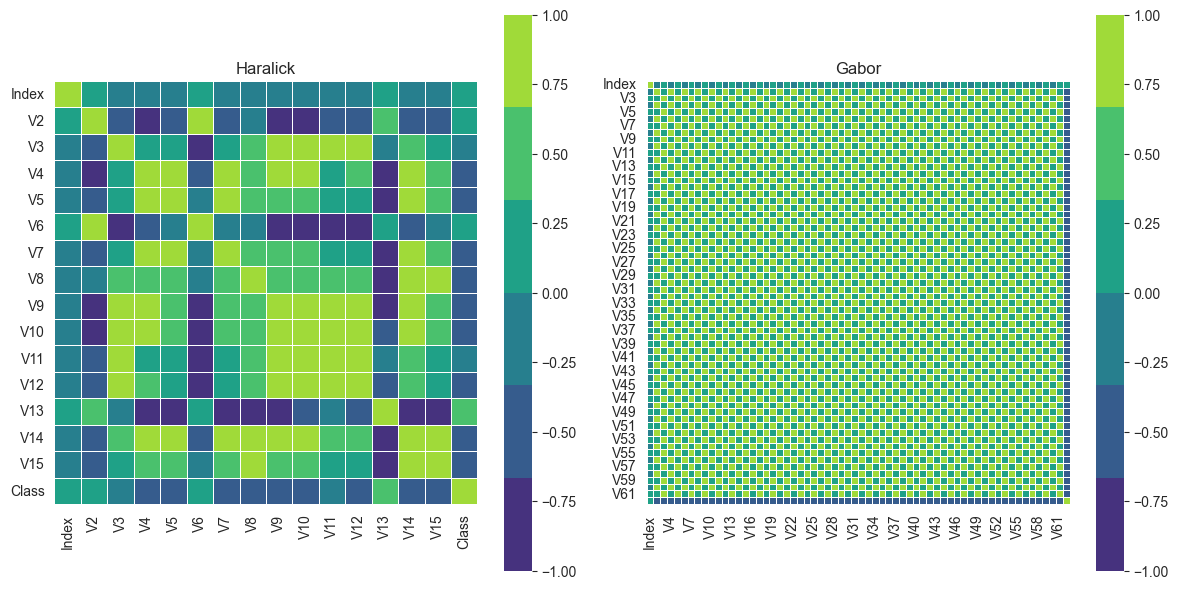

In [38]:
_, axes = plt.subplots(1, 2, figsize=(12,6))

colormap = sns.color_palette("viridis")

sns.heatmap(train_Haralick.corr(), ax=axes[0], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[0].set_title('Haralick')

sns.heatmap(train_Gabor.corr(), ax=axes[1], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[1].set_title('Gabor')

plt.tight_layout()
plt.show()

In [39]:
train_Haralick = removeDuplicatedColumns(train_Haralick)
train_Gabor = removeDuplicatedColumns(train_Gabor)

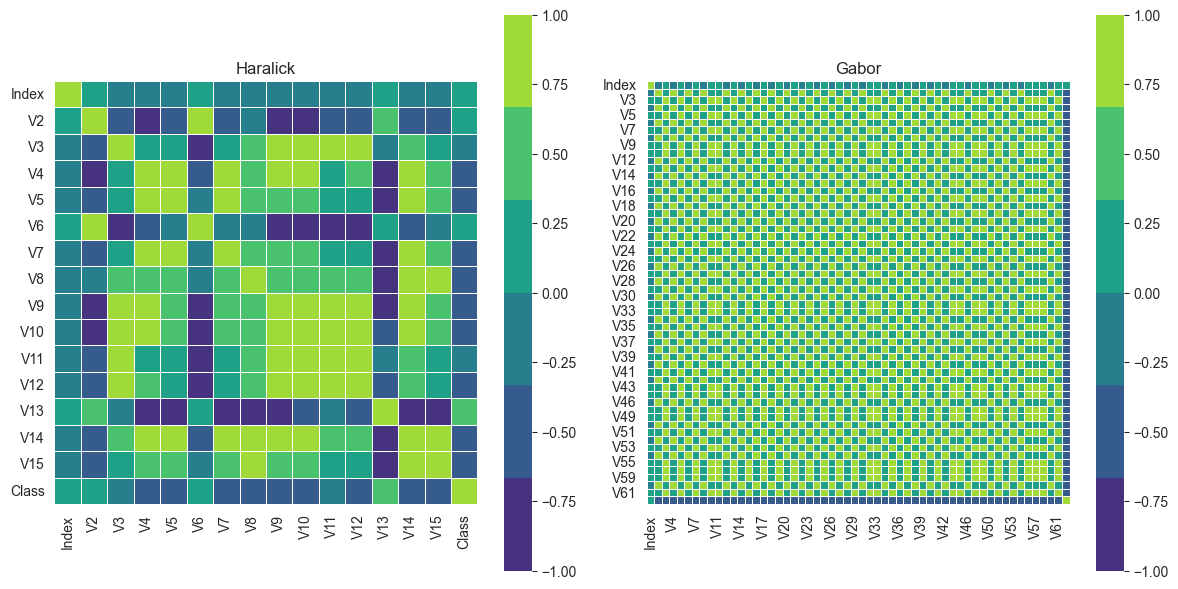

In [40]:
_, axes = plt.subplots(1, 2, figsize=(12,6))

colormap = sns.color_palette("viridis")

sns.heatmap(train_Haralick.corr(), ax=axes[0], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[0].set_title('Haralick')

sns.heatmap(train_Gabor.corr(), ax=axes[1], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[1].set_title('Gabor')

plt.tight_layout()
plt.show()

In [41]:
train_Haralick = removeFullyCorrelated(train_Haralick)
train_Gabor = removeFullyCorrelated(train_Gabor)

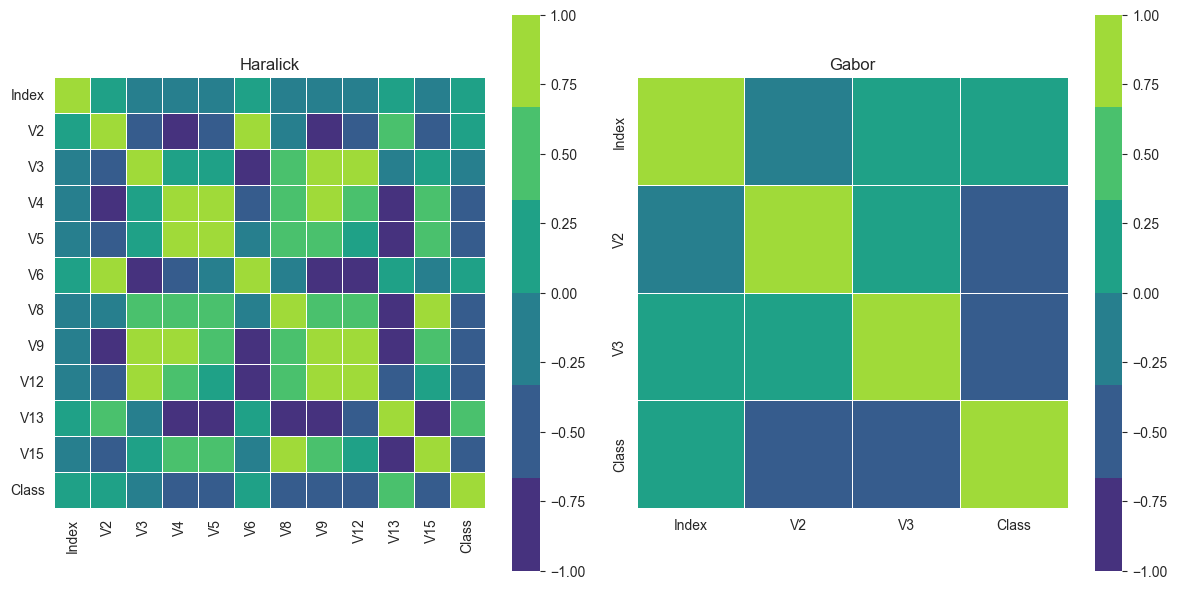

In [42]:
_, axes = plt.subplots(1, 2, figsize=(12,6))

colormap = sns.color_palette("viridis")

sns.heatmap(train_Haralick.corr(), ax=axes[0], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[0].set_title('Haralick')

sns.heatmap(train_Gabor.corr(), ax=axes[1], vmin=-1, vmax=1, annot=False, square=True, linewidths=.5, cmap=colormap)
axes[1].set_title('Gabor')

plt.tight_layout()
plt.show()

In [45]:
train_AutoColorCorrelogram = minMaxScaling(train_AutoColorCorrelogram)
train_CEDD = minMaxScaling(train_CEDD)
train_FCTH = minMaxScaling(train_FCTH)
train_Haralick = minMaxScaling(train_Haralick)
train_Gabor = minMaxScaling(train_Gabor)